<a href="https://colab.research.google.com/github/maryskal/mamography_uoc/blob/main/hyperparameter_tunning_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#df_big = pd.read_csv("./hyperparameter_results_big.csv")
df = pd.read_csv("./hyperparameter_tuning_results.csv")

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'model_name', 'frozen_proportion',
       'learning_rate', 'val_auc', 'val_accuracy', 'val_loss',
       'val_precision'],
      dtype='object')

In [18]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [19]:
len(df)

80

In [23]:
for metric in ['val_auc', 'val_accuracy', 'val_precision']:
  mx = max(df[metric])
  print(f'Max {metric}: {round(mx,2)} is from {list(df.model_name[df[metric] == mx])}')
  print(df[df[metric] == mx])
  print('\n')

mx = min(df['val_loss'])
print(f'Min val_loss: {round(mx,2)} is from {list(df.model_name[df.val_loss == mx])}')
print(df[df['val_loss'] == mx])

Max val_auc: 0.99 is from ['ViT']
   model_name  frozen_proportion  learning_rate   val_auc  val_accuracy  \
30        ViT           0.443658       0.000539  0.987045      0.910049   

    val_loss  val_precision  
30  2.802011       0.983262  


Max val_accuracy: 0.91 is from ['ViT']
   model_name  frozen_proportion  learning_rate   val_auc  val_accuracy  \
55        ViT           0.422669        0.00049  0.978904      0.911481   

    val_loss  val_precision  
55  1.071264       0.922085  


Max val_precision: 1.0 is from ['CNN', 'CNN']
   model_name  frozen_proportion  learning_rate   val_auc  val_accuracy  \
3         CNN           0.520711       0.000870  0.278656      0.070945   
58        CNN           0.958136       0.000368  0.227897      0.081750   

    val_loss  val_precision  
3   1.689896            1.0  
58  1.472586            1.0  


Min val_loss: 0.57 is from ['ViT']
  model_name  frozen_proportion  learning_rate   val_auc  val_accuracy  \
1        ViT           0.609

In [15]:
df_vit = df[df.model_name == 'ViT']
df_cnn = df[df.model_name == 'CNN']

In [51]:
print(len(df_vit))
print(len(df_cnn))

46
34


In [52]:
for metric in ['val_auc', 'val_accuracy', 'val_precision']:
  mean_vit = np.median(df_vit[metric])
  mean_cnn = np.median(df_cnn[metric])
  print(f'VIT {metric}: {mean_vit} IR{np.quantile(df_vit[metric], [0.25,0.75])}')
  print(f'CNN {metric}: {mean_cnn} IR{np.quantile(df_cnn[metric], [0.25,0.75])}')

metric = 'val_loss'
mean_vit = np.median(df_vit[metric])
mean_cnn = np.median(df_cnn[metric])
print(f'VIT {metric}: {mean_vit} IR{np.quantile(df_vit[metric], [0.25,0.75])}')
print(f'CNN {metric}: {mean_cnn} IR{np.quantile(df_cnn[metric], [0.25,0.75])}')

VIT val_auc: 0.9629552960395813 IR[0.94426769 0.97554857]
CNN val_auc: 0.8893748223781586 IR[0.66247086 0.93914191]
VIT val_accuracy: 0.8724290728569031 IR[0.83292109 0.88827778]
CNN val_accuracy: 0.7496745586395264 IR[0.53241344 0.82524082]
VIT val_precision: 0.907726675271988 IR[0.87874737 0.92751753]
CNN val_precision: 0.8999028205871582 IR[0.85043606 0.92262939]
VIT val_loss: 1.5680689811706543 IR[1.01077774 3.2714206 ]
CNN val_loss: 1.4589462280273438 IR[1.35753319 1.5927344 ]


In [42]:
for i in [1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4, 1e-3]:
  vit = df_vit.val_auc[(df_vit.learning_rate > i) & (df_vit.learning_rate < i+1e-4)]
  cnn = df_cnn.val_auc[(df_cnn.learning_rate > i) & (df_cnn.learning_rate < i+1e-4)]
  try:
    print(f'VIT lr {i}: {np.median(vit)} IR{np.quantile(vit, [0.25,0.75])}')
  except:
    print("VIT no encontrado")
  try:
    print(f'CNN lr {i}: {np.median(cnn)} IR{np.quantile(cnn, [0.25,0.75])}')
  except:
    print("CNN no encontrado")

VIT lr 0.0001: 0.966516613960266 IR[0.96243066 0.97362082]
CNN no encontrado
VIT lr 0.0002: 0.9805349707603455 IR[0.98018488 0.98088506]
CNN lr 0.0002: 0.8675746321678162 IR[0.85442445 0.88072482]
VIT lr 0.0003: 0.9618194103240967 IR[0.95934834 0.9681188 ]
CNN lr 0.0003: 0.9260168969631195 IR[0.57679201 0.95168476]
VIT lr 0.0004: 0.961811125278473 IR[0.94900425 0.97477145]
CNN no encontrado
VIT lr 0.0005: 0.976930171251297 IR[0.96826613 0.9799564 ]
CNN lr 0.0005: 0.8777789771556854 IR[0.86153424 0.89155376]
VIT lr 0.0006: 0.949155181646347 IR[0.72800336 0.96608965]
CNN lr 0.0006: 0.8723678290843964 IR[0.74295732 0.95115665]
VIT lr 0.0007: 0.956511825323105 IR[0.95022011 0.96138206]
CNN lr 0.0007: 0.8693556189537048 IR[0.85674697 0.88196427]
VIT lr 0.0008: 0.9700160920619965 IR[0.94398063 0.97844841]
CNN lr 0.0008: 0.9271455705165864 IR[0.75620071 0.94342083]
VIT lr 0.0009: 0.9062297940254211 IR[0.88386172 0.92859787]
CNN lr 0.0009: 0.6495822221040726 IR[0.42645104 0.84467851]
VIT no en

In [45]:
fp_vit = []
fp_cnn = []
for i in [0,0.2,0.4,0.6,0.8]:
  vit = df_vit.val_auc[(df_vit.frozen_proportion > i) & (df_vit.frozen_proportion < i+0.2)]
  cnn = df_cnn.val_auc[(df_cnn.frozen_proportion > i) & (df_cnn.frozen_proportion < i+0.2)]
  fp_vit.append(np.median(vit))
  fp_cnn.append(np.median(cnn))
  try:
    print(f'VIT frozen proportion {i}: {np.median(vit)} IR{np.quantile(vit, [0.25,0.75])}')
  except:
    print("VIT no encontrado")
  try:
    print(f'CNN frozen proportion {i}: {np.median(cnn)} IR{np.quantile(cnn, [0.25,0.75])}')
  except:
    print("CNN no encontrado")

VIT frozen proportion 0: 0.9617983996868134 IR[0.94709323 0.96534736]
CNN frozen proportion 0: 0.9692279100418091 IR[0.95581703 0.97403069]
VIT frozen proportion 0.2: 0.9695339202880859 IR[0.95795944 0.97797954]
CNN frozen proportion 0.2: 0.930239349603653 IR[0.91474025 0.9480615 ]
VIT frozen proportion 0.4: 0.9771979451179504 IR[0.97554857 0.98002483]
CNN frozen proportion 0.4: 0.8693556189537048 IR[0.70276775 0.9056569 ]
VIT frozen proportion 0.6: 0.9428872168064117 IR[0.92534479 0.96217932]
CNN frozen proportion 0.6: 0.6318983137607574 IR[0.50179701 0.808404  ]
VIT frozen proportion 0.8: 0.9442411959171295 IR[0.93657675 0.95078155]
CNN frozen proportion 0.8: 0.8376806378364563 IR[0.43727639 0.89162491]


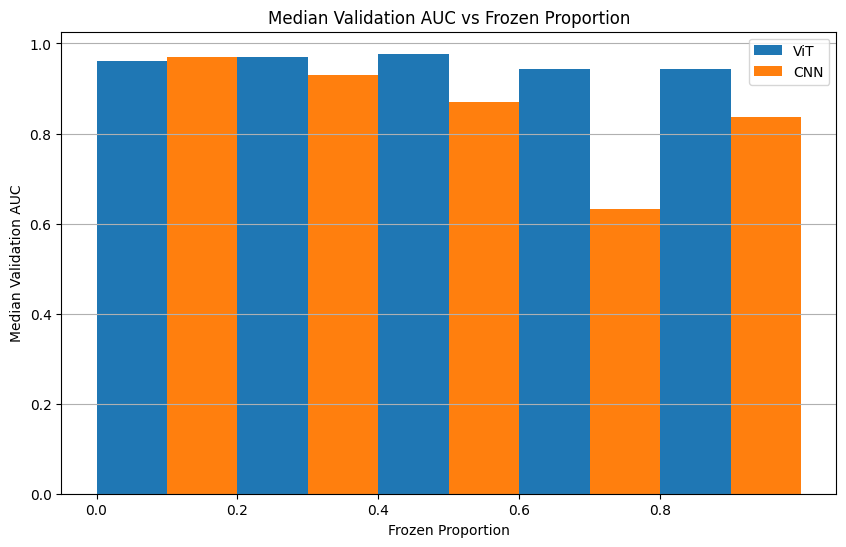

In [47]:
frozen_proportions = [0, 0.2, 0.4, 0.6, 0.8]
plt.figure(figsize=(10, 6))
plt.bar(frozen_proportions, fp_vit, width=0.1, label='ViT', align='edge')
plt.bar(np.array(frozen_proportions) + 0.1, fp_cnn, width=0.1, label='CNN', align='edge')
plt.xlabel('Frozen Proportion')
plt.ylabel('Median Validation AUC')
plt.title('Median Validation AUC vs Frozen Proportion')
plt.xticks(frozen_proportions)
plt.legend()
plt.grid(axis='y')
plt.show()

<ipython-input-48-6b5eac5c405b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model_name', y='val_auc', data=df, palette='muted')


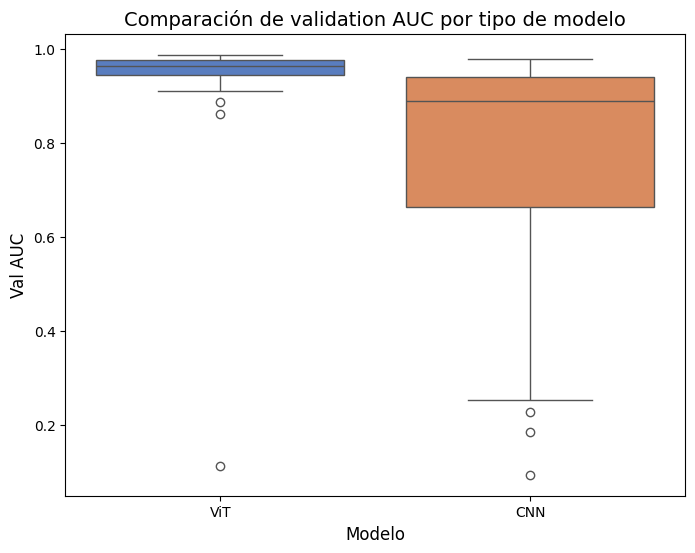

In [48]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='model_name', y='val_auc', data=df, palette='muted')

# Personalizar el gráfico
plt.title('Comparación de validation AUC por tipo de modelo', fontsize=14)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Val AUC', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

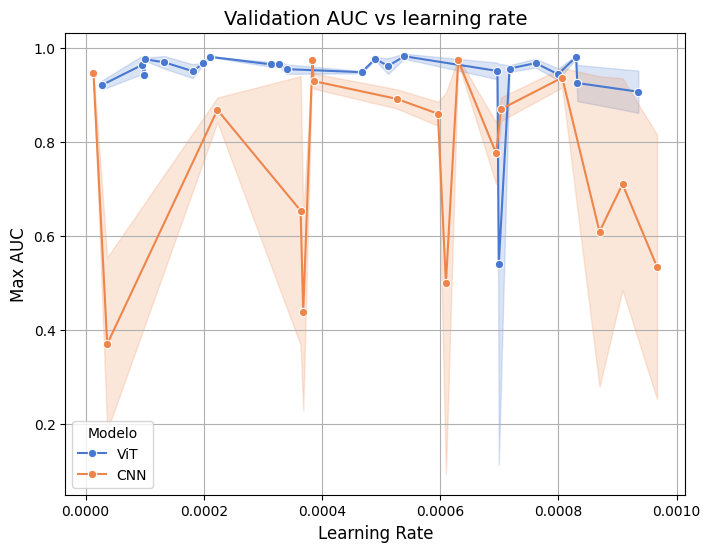

In [49]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='learning_rate', y='val_auc', hue='model_name', data=df, marker='o', palette='muted')
plt.title('Validation AUC vs learning rate', fontsize=14)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Max AUC', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(title='Modelo', fontsize=10)
plt.show()

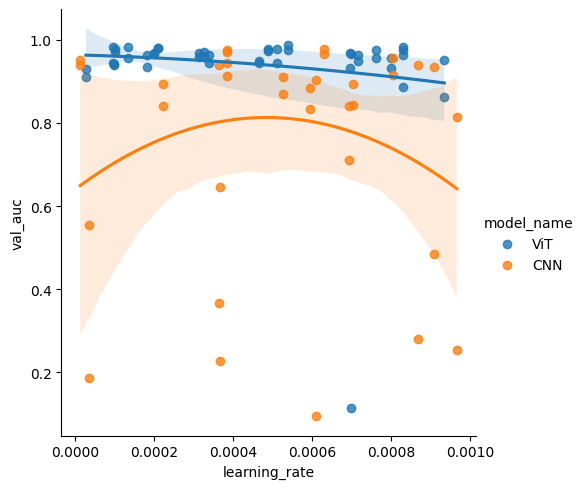

In [ ]:
sns.lmplot(
    x='learning_rate',
    y='val_auc',
    hue='model_name',
    data=df,
    order=2,
    markers='o'  # Un solo marcador para todos los modelos
)

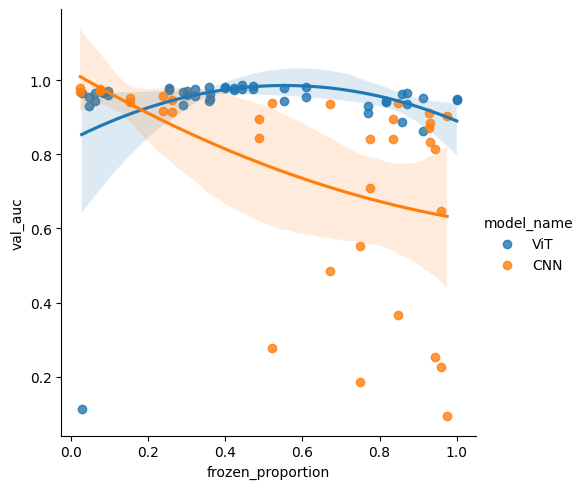

In [ ]:
sns.lmplot(
    x='frozen_proportion',
    y='val_auc',
    hue='model_name',
    data=df,
    order=2,
    markers='o'  # Un solo marcador para todos los modelos
)

In [54]:
from scipy import stats

In [ ]:
grupo1 = df['val_auc'][df.model_name == 'ViT']
grupo2 = df['val_auc'][df.model_name == 'CNN']

In [ ]:
stat1, p_value1 = stats.shapiro(grupo1)
stat2, p_value2 = stats.shapiro(grupo2)

print(f"Prueba Shapiro-Wilk para Grupo 1: p-value = {p_value1}")
print(f"Prueba Shapiro-Wilk para Grupo 2: p-value = {p_value2}")

Prueba Shapiro-Wilk para Grupo 1: p-value = 9.079950088743134e-14
Prueba Shapiro-Wilk para Grupo 2: p-value = 3.3031557123076507e-06


In [ ]:
stat, p_value_levene = stats.levene(grupo1, grupo2)

print(f"Prueba de Levene: p-value = {p_value_levene}")

Prueba de Levene: p-value = 0.0006752897280893618


In [ ]:
print(f'{np.mean(df_vit.val_auc)} {np.quantile(df_vit.val_auc, [0.15,0.75])}')
print(f'{np.mean(df_cnn.val_auc)} {np.quantile(df_cnn.val_auc, [0.15,0.75])}')

0.9384172555545102 [0.9346536  0.97554857]
0.7547605112195015 [0.36307545 0.93914191]


In [55]:
for metric in ['val_auc', 'val_accuracy', 'val_precision', 'val_loss']:
  grupo1 = df[metric][df.model_name == 'ViT']
  grupo2 = df[metric][df.model_name == 'CNN']
  stat, p_value = stats.mannwhitneyu(grupo1, grupo2)
  print(f"Prueba de Mann-Whitney U {metric}: p-value = {p_value}")

Prueba de Mann-Whitney U val_auc: p-value = 2.4282245522961736e-07
Prueba de Mann-Whitney U val_accuracy: p-value = 7.089862132109042e-07
Prueba de Mann-Whitney U val_precision: p-value = 0.3890497858465639
Prueba de Mann-Whitney U val_loss: p-value = 0.3890525651331016
